# Análises sobre os tokens
Análise sobre os dados da camada refined:
*   Contagem de palavras
*   Palavras mais frequentes
*   Palavras mais frequentes aos pares
*   Bigramas e Trigamas mais frequentes
*   Nuvem de palavras




### Leitura da tabela dlzd_olist_order_reviews_clean

In [2]:
import pandas as pd
import itertools
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from matplotlib import cm
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pandas as pd
df_reviews = pd.read_parquet('../dataset/delivery/dlzd_olist_order_reviews_clean.parquet.snappy')

## Contagem de palavras

In [4]:
word_counts = Counter([token for sublist in df_reviews['review_comment_title_and_message'] for token in sublist])

total_words = sum(word_counts.values())
unique_words = len(word_counts)
# palavras que aparecem até 3 vezes e mais de 3 vezes
words_least_than_3 = {word: count for word, count in word_counts.items() if count <= 3}
words_more_than_3 = {word: count for word, count in word_counts.items() if count > 3}

# diversidade lexical -> proximo de 1 indica muita variação
lexical_diversity = unique_words / total_words

print(f"Total de palavras: {total_words}")
print(f"Total de palavras únicas: {unique_words}")
print(f"Total de palavras que aparecem até 3 vezes: {len(words_least_than_3)}")
print(f"Total de palavras que ocorrem mais de 3 vezes: {len(words_more_than_3)}")
print(f"Diversidade lexical: {lexical_diversity:.4f}")

Total de palavras: 100550
Total de palavras únicas: 9584
Total de palavras que aparecem até 3 vezes: 7107
Total de palavras que ocorrem mais de 3 vezes: 2477
Diversidade lexical: 0.0953


## Contagem das 20 palavras mais frequentes

Removendo palavras que não agregam contexto

In [5]:
words_to_remove = {'so', 'ate', 'recebi', 'veio', 'prazo', 'chegou', 'entregue', 'ok', 'pra'}

df_reviews['review_comment_title_and_message'] = df_reviews['review_comment_title_and_message'].apply(
    lambda tokens: [word for word in tokens if word not in words_to_remove]
)

In [6]:
word_counts_clean = Counter([token for tokens_list in df_reviews['review_comment_title_and_message'] for token in tokens_list])

top_25_words_clean = word_counts_clean.most_common(25)
top_25_words_clean

[('produto', 6783),
 ('nao', 4422),
 ('recomendo', 3193),
 ('otimo', 2194),
 ('qualidade', 1484),
 ('excelente', 1334),
 ('gostei', 1213),
 ('loja', 1081),
 ('super', 952),
 ('compra', 939),
 ('comprei', 879),
 ('otima', 780),
 ('lannister', 528),
 ('comprar', 494),
 ('ja', 491),
 ('site', 488),
 ('adorei', 445),
 ('perfeito', 413),
 ('porem', 412),
 ('atendimento', 410),
 ('certo', 402),
 ('parabens', 390),
 ('lindo', 390),
 ('amei', 381),
 ('nota', 374)]

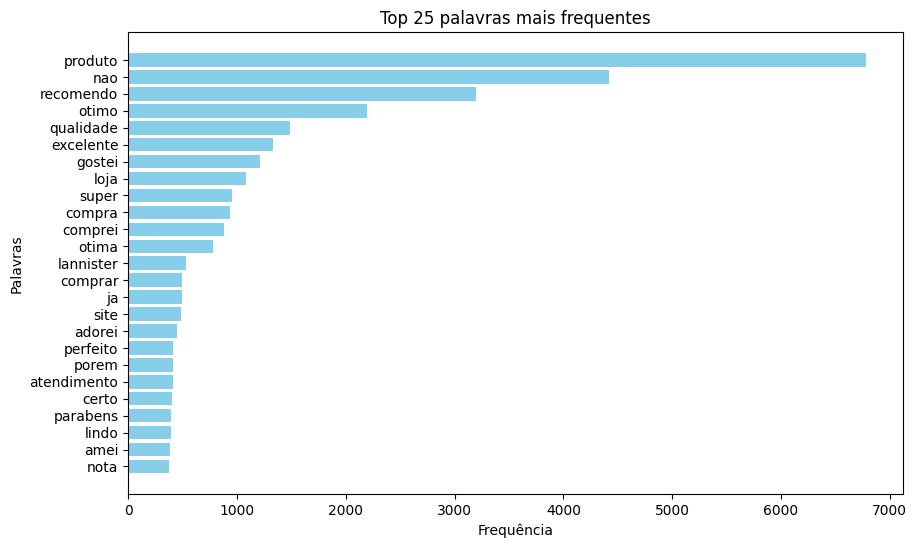

In [7]:
words, counts = zip(*top_25_words_clean)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Palavras')
plt.title('Top 25 palavras mais frequentes')
plt.gca().invert_yaxis()  # mostrar as palavras mais frequentes no topo
plt.show()

### Top palavras de avaliações negativas

In [8]:
negative_reviews = df_reviews[df_reviews['review_score'] < 3]
word_counts_negative = Counter([token for tokens_list in negative_reviews['review_comment_title_and_message'] for token in tokens_list])
top_25_words_negative = word_counts_negative.most_common(25)
top_25_words_negative

[('nao', 2724),
 ('produto', 2353),
 ('comprei', 574),
 ('qualidade', 378),
 ('compra', 325),
 ('loja', 287),
 ('recomendo', 257),
 ('ja', 256),
 ('pedido', 230),
 ('defeito', 223),
 ('diferente', 200),
 ('lannister', 195),
 ('site', 187),
 ('gostei', 182),
 ('pessima', 182),
 ('outro', 172),
 ('troca', 170),
 ('errado', 162),
 ('pedi', 159),
 ('devolucao', 154),
 ('aguardando', 153),
 ('contato', 153),
 ('ruim', 152),
 ('foto', 149),
 ('relogio', 142)]

### Top palavras para avaliações neutras

In [16]:
neutral_reviews = df_reviews[df_reviews['review_score'] == 3]
word_counts_neutral = Counter([token for tokens_list in neutral_reviews['review_comment_title_and_message'] for token in tokens_list])
top_25_words_neutral = word_counts_neutral.most_common(25)
top_25_words_neutral

[('produto', 722),
 ('nao', 705),
 ('qualidade', 141),
 ('recomendo', 131),
 ('porem', 128),
 ('gostei', 104),
 ('comprei', 96),
 ('achei', 84),
 ('compra', 81),
 ('foto', 62),
 ('loja', 60),
 ('material', 55),
 ('ja', 54),
 ('melhor', 52),
 ('esperava', 52),
 ('problema', 50),
 ('relogio', 49),
 ('cor', 47),
 ('caixa', 46),
 ('embalagem', 45),
 ('sao', 45),
 ('tamanho', 45),
 ('site', 44),
 ('otimo', 44),
 ('defeito', 41)]

Palavras mais frequentes em avaliações positivas

In [9]:
positive_reviews = df_reviews[df_reviews['review_score'] > 3]
word_counts_positive = Counter([token for tokens_list in positive_reviews['review_comment_title_and_message'] for token in tokens_list])
top_25_words_positive = word_counts_positive.most_common(25)
top_25_words_positive

[('produto', 3708),
 ('recomendo', 2805),
 ('otimo', 2136),
 ('excelente', 1309),
 ('nao', 993),
 ('qualidade', 965),
 ('gostei', 927),
 ('super', 913),
 ('otima', 747),
 ('loja', 734),
 ('compra', 533),
 ('adorei', 436),
 ('perfeito', 397),
 ('comprar', 396),
 ('parabens', 385),
 ('amei', 374),
 ('lindo', 367),
 ('atendimento', 353),
 ('rapido', 343),
 ('certo', 333),
 ('satisfeito', 330),
 ('lannister', 311),
 ('satisfeita', 276),
 ('bonito', 265),
 ('conforme', 262)]

## Análise ocorrencias em pares


In [10]:
pair_counts_clean = Counter()

for tokens in df_reviews['review_comment_title_and_message']:
    pairs = [tuple(sorted((a, b))) for a, b in itertools.combinations(tokens, 2) if a != b]
    pair_counts_clean.update(pairs)

In [11]:
top_25_pairs = pair_counts_clean.most_common(20)
top_25_pairs

[(('nao', 'produto'), 2663),
 (('produto', 'qualidade'), 1101),
 (('produto', 'recomendo'), 990),
 (('otimo', 'produto'), 811),
 (('recomendo', 'super'), 653),
 (('nao', 'recomendo'), 562),
 (('excelente', 'produto'), 555),
 (('comprei', 'nao'), 507),
 (('gostei', 'produto'), 479),
 (('loja', 'produto'), 455),
 (('gostei', 'nao'), 447),
 (('comprei', 'produto'), 447),
 (('nao', 'qualidade'), 430),
 (('compra', 'nao'), 365),
 (('loja', 'nao'), 353),
 (('otimo', 'recomendo'), 346),
 (('compra', 'produto'), 340),
 (('loja', 'recomendo'), 298),
 (('otima', 'qualidade'), 282),
 (('defeito', 'produto'), 280)]

## Bigramas e Trigramas mais frequentes

In [12]:
# todas as listas de palavras em uma única lista
all_tokens = list(itertools.chain(*df_reviews['review_comment_title_and_message']))

# extrair bigramas e trigramas
def extract_ngrams(tokens, n):
    ngrams = nltk.ngrams(tokens, n)
    return Counter(ngrams)

# contagem bigramas
bigrams = extract_ngrams(all_tokens, 2)
print("25 bigramas mais frequentes:")
for bigram, count in bigrams.most_common(25):
    print(f"{bigram}: {count} vezes")

# contagem trigramas
trigrams = extract_ngrams(all_tokens, 3)
print("\n25 trigramas mais frequentes:")
for trigram, count in trigrams.most_common(25):
    print(f"{trigram}: {count} vezes")

25 bigramas mais frequentes:
('otimo', 'produto'): 639 vezes
('super', 'recomendo'): 562 vezes
('produto', 'nao'): 525 vezes
('recomendo', 'produto'): 463 vezes
('gostei', 'produto'): 289 vezes
('excelente', 'produto'): 279 vezes
('produto', 'qualidade'): 275 vezes
('otima', 'qualidade'): 251 vezes
('produto', 'excelente'): 246 vezes
('nao', 'recomendo'): 242 vezes
('recomendo', 'otimo'): 242 vezes
('produto', 'recomendo'): 235 vezes
('nao', 'gostei'): 230 vezes
('produto', 'produto'): 217 vezes
('produto', 'otimo'): 208 vezes
('recomendo', 'recomendo'): 162 vezes
('produto', 'defeito'): 155 vezes
('qualidade', 'produto'): 155 vezes
('recomendo', 'loja'): 153 vezes
('otimo', 'otimo'): 145 vezes
('produto', 'otima'): 141 vezes
('lojas', 'lannister'): 137 vezes
('nao', 'funciona'): 128 vezes
('pessima', 'qualidade'): 118 vezes
('nota', 'fiscal'): 114 vezes

25 trigramas mais frequentes:
('produto', 'otima', 'qualidade'): 110 vezes
('super', 'recomendo', 'produto'): 86 vezes
('recomendo',

## Nuvem de palavras

<ipython-input-13-2c4debdef144>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


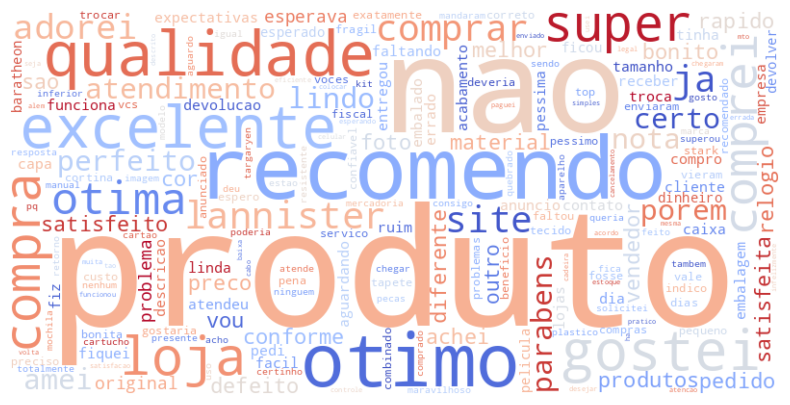

In [13]:
colormap = cm.get_cmap('coolwarm')
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=colormap).generate_from_frequencies(word_counts_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Nuvem de palavras de avaliações negativas

<ipython-input-14-f64225f1ad5e>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


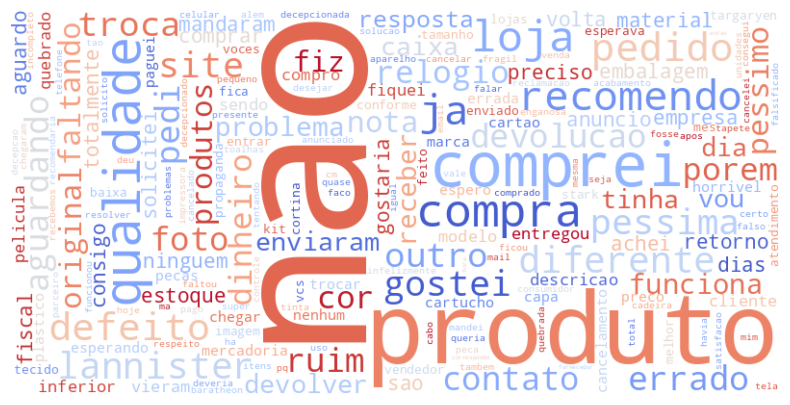

In [14]:
colormap = cm.get_cmap('coolwarm')
wordcloud_negative = WordCloud(width=800, height=400, background_color="white", colormap=colormap).generate_from_frequencies(word_counts_negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

Nuvem de palavras de avaliações neutras

<ipython-input-17-97b38e2fce50>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


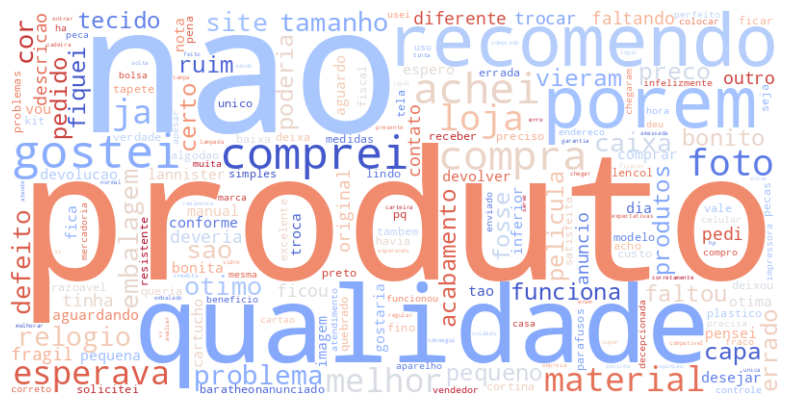

In [17]:
colormap = cm.get_cmap('coolwarm')
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white", colormap=colormap).generate_from_frequencies(word_counts_neutral)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.show()

Nuvem de palavras de avaliações positivas

<ipython-input-18-1cd50a2d71c4>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


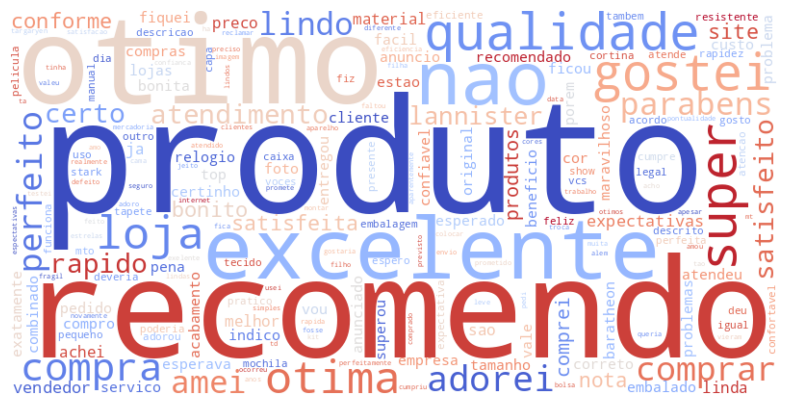

In [18]:
colormap = cm.get_cmap('coolwarm')
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap=colormap).generate_from_frequencies(word_counts_positive)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()